In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('wine.csv')  # Replace with your actual file path


In [4]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
print(f"Shape of dataset: {df.shape}")

Shape of dataset: (178, 14)


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB
None


In [7]:
print(df.describe())


             Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     1.938202   13.000618    2.336348    2.366517   19.494944   99.741573   
std      0.775035    0.811827    1.117146    0.274344    3.339564   14.282484   
min      1.000000   11.030000    0.740000    1.360000   10.600000   70.000000   
25%      1.000000   12.362500    1.602500    2.210000   17.200000   88.000000   
50%      2.000000   13.050000    1.865000    2.360000   19.500000   98.000000   
75%      3.000000   13.677500    3.082500    2.557500   21.500000  107.000000   
max      3.000000   14.830000    5.800000    3.230000   30.000000  162.000000   

          Phenols  Flavanoids  Nonflavanoids  Proanthocyanins       Color  \
count  178.000000  178.000000     178.000000       178.000000  178.000000   
mean     2.295112    2.029270       0.361854         1.590899    5.058090   
std      0.625851    0.998859       0.1

In [8]:
print(df.isnull().sum())

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
sns.set(style='whitegrid')

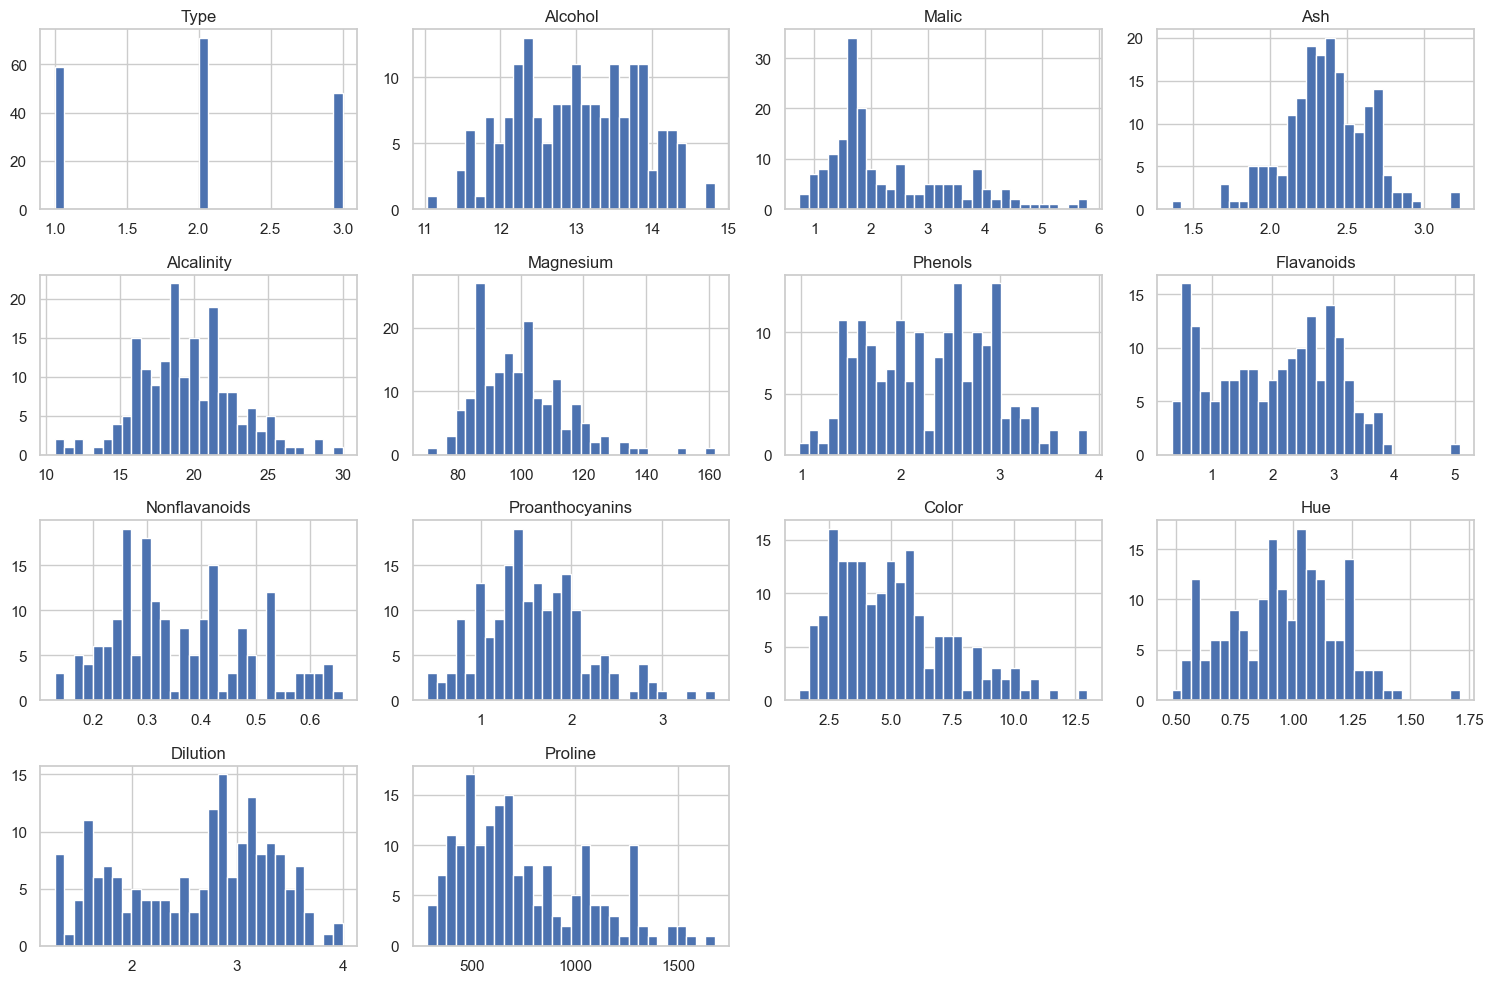

In [11]:
# Histograms for numerical features
df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()


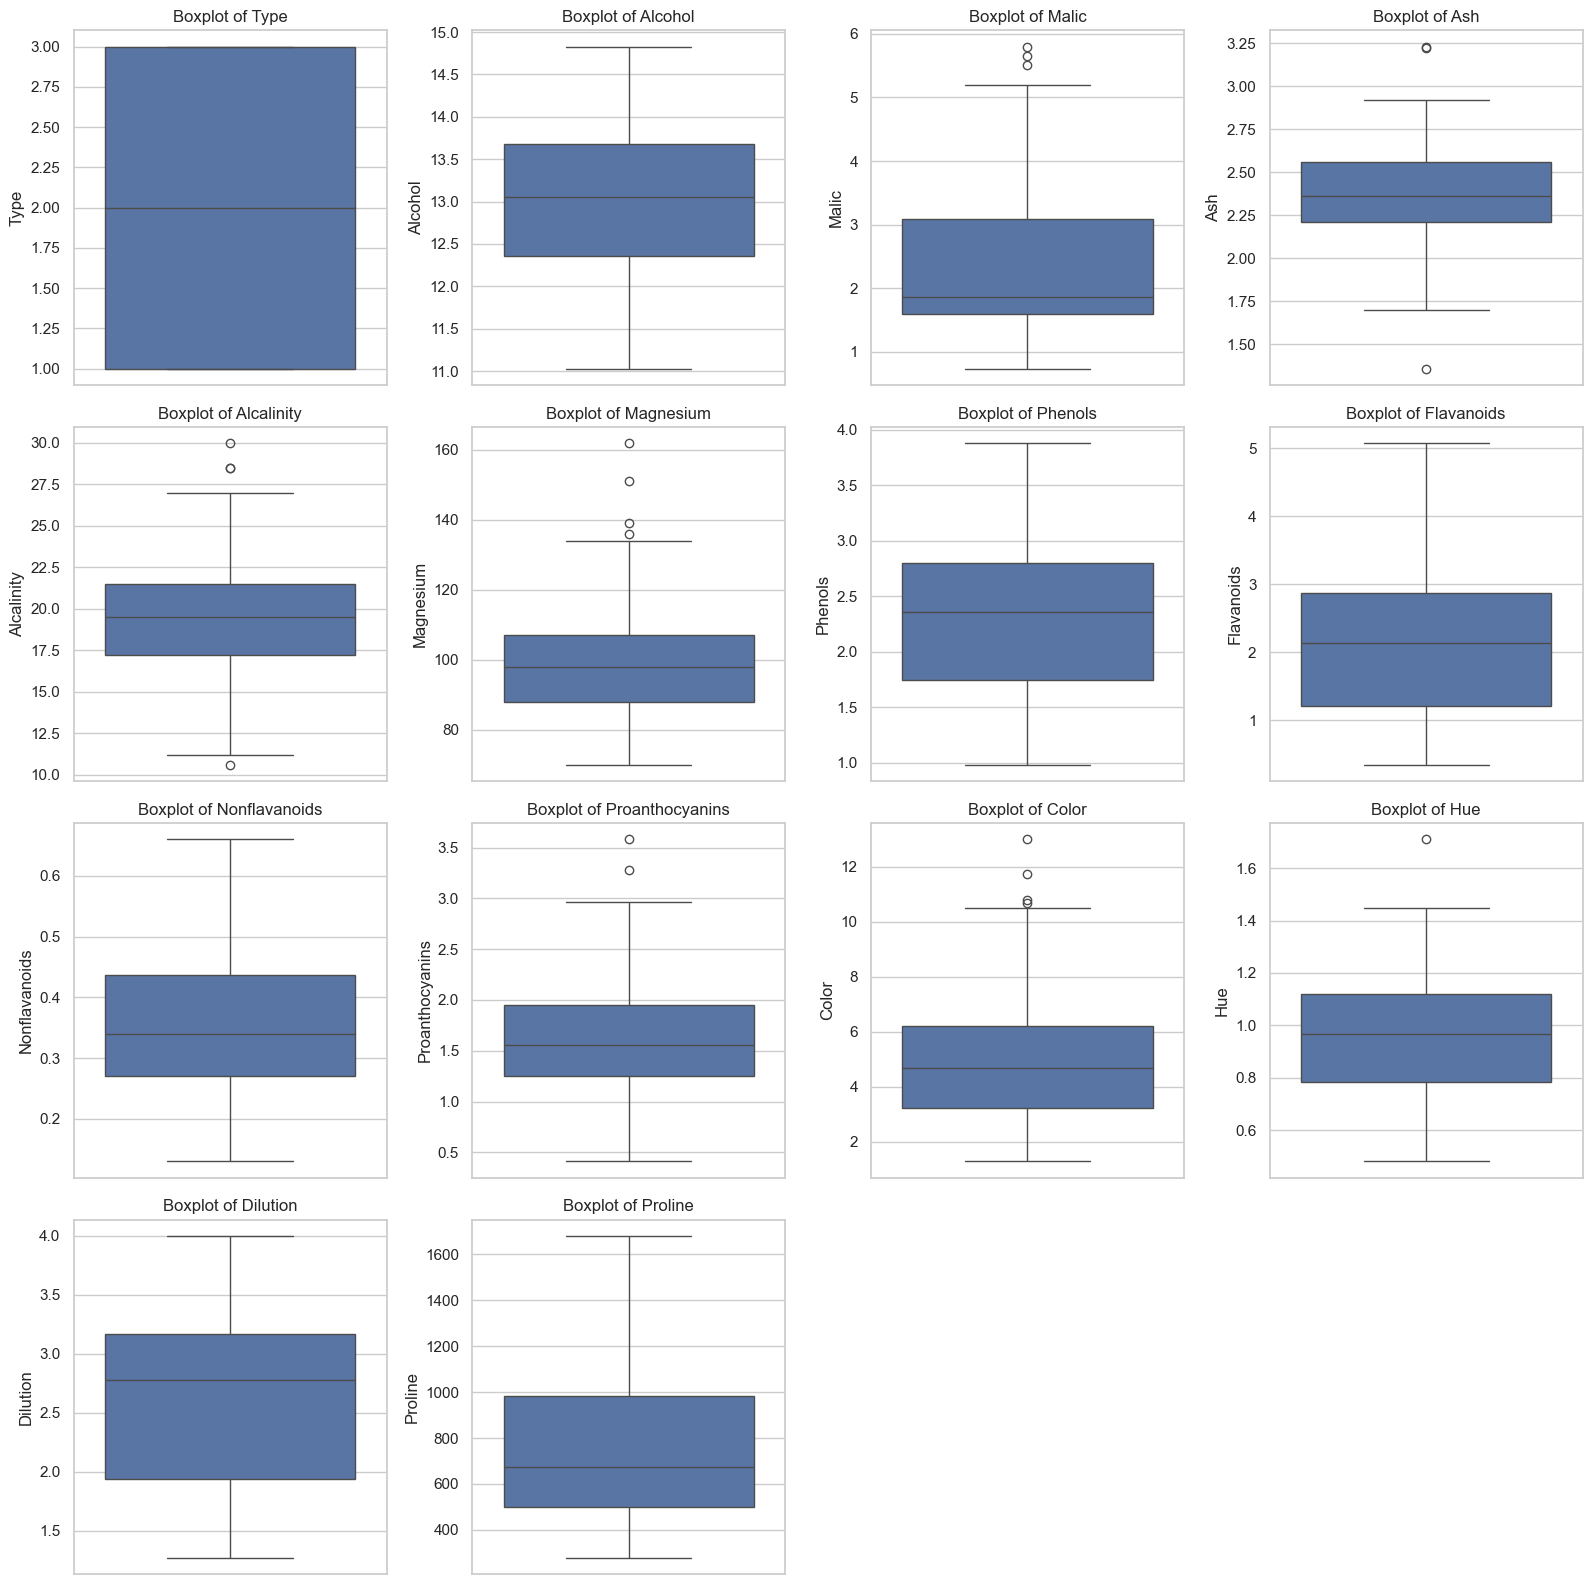

In [13]:
import math

# Get numeric columns
numeric_cols = df.select_dtypes(include='number').columns
n_features = len(numeric_cols)

# Define subplot grid
n_cols = 4
n_rows = math.ceil(n_features / n_cols)

# Create subplots
plt.figure(figsize=(n_cols * 4, n_rows * 4))
for i, column in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')
    
plt.tight_layout()
plt.show()


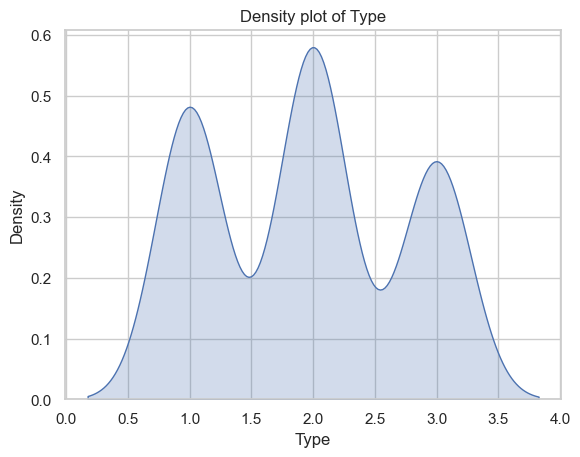

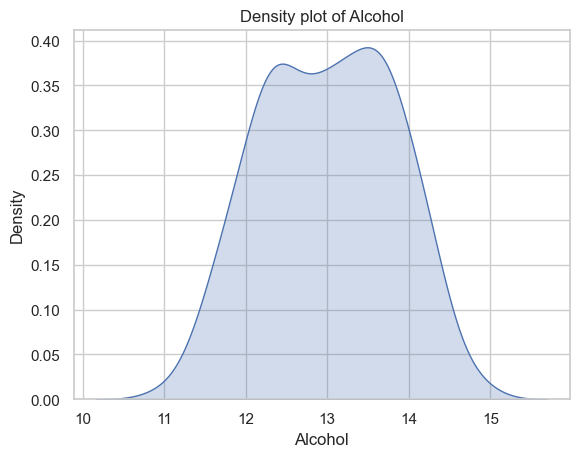

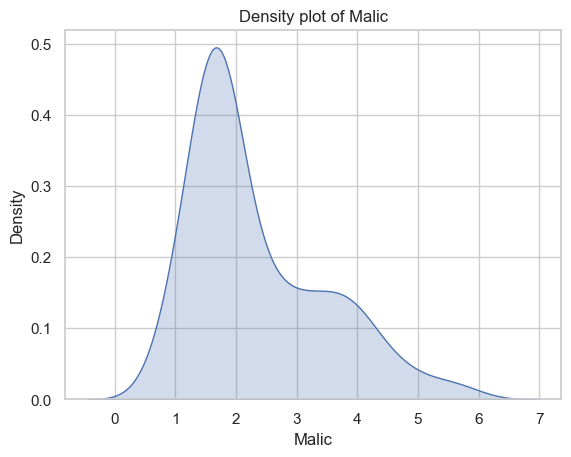

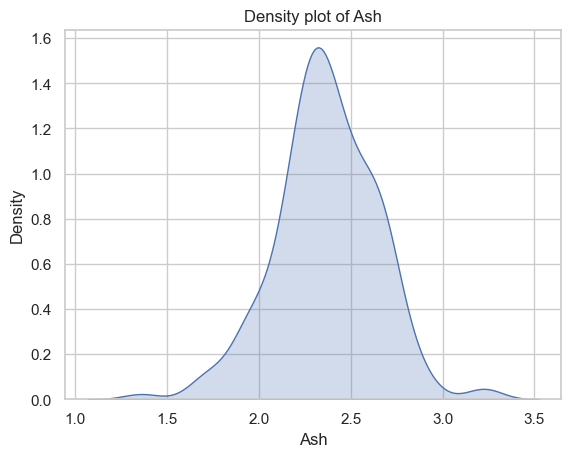

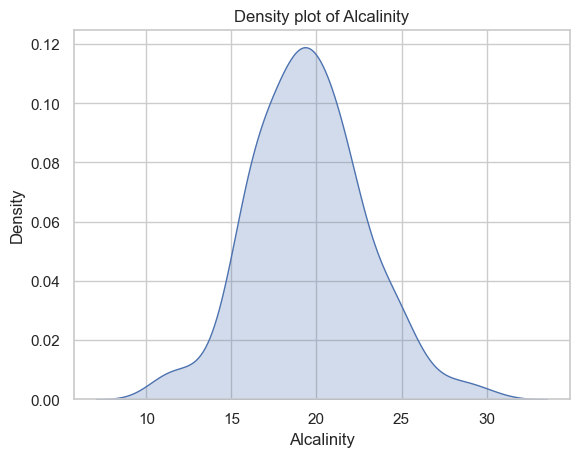

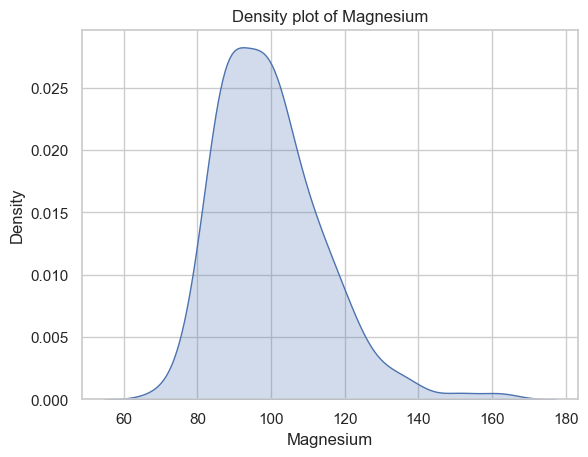

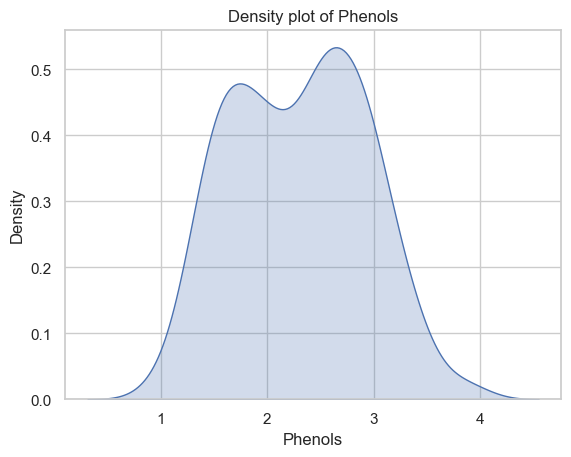

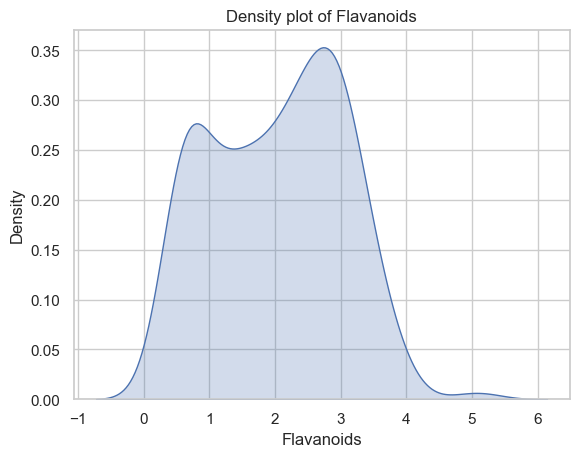

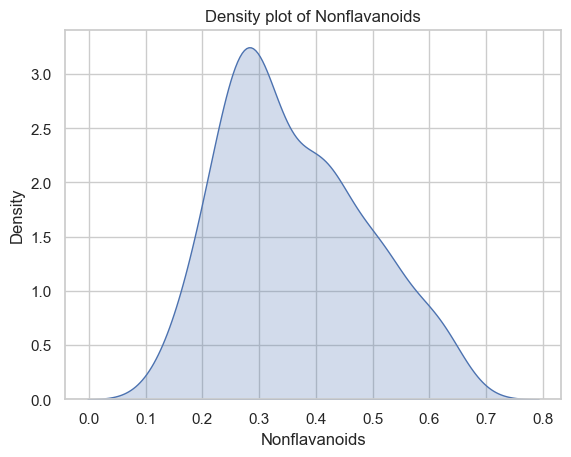

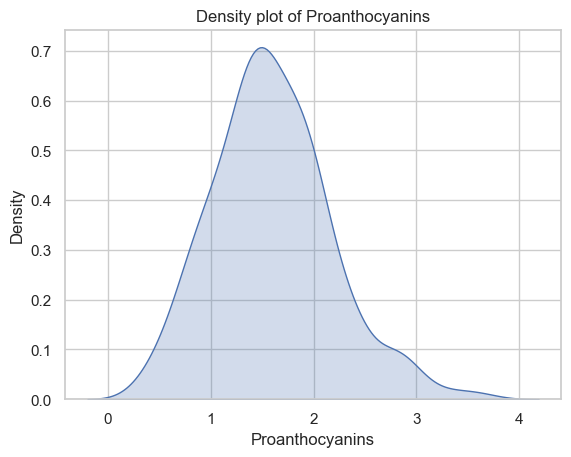

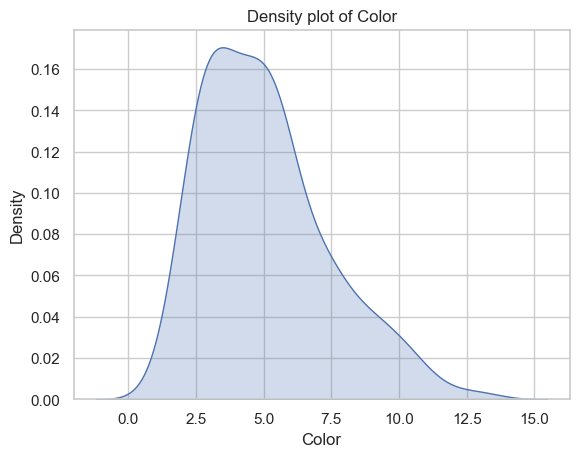

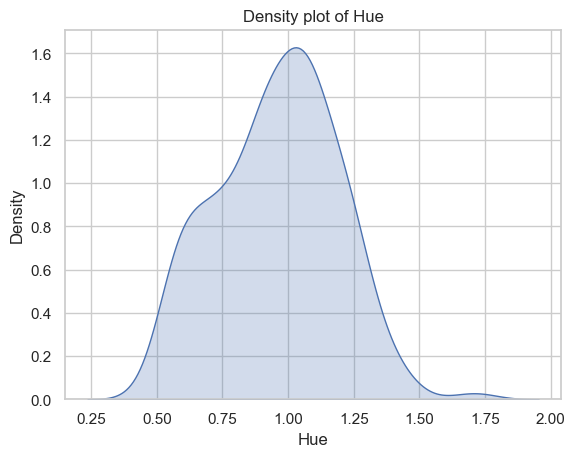

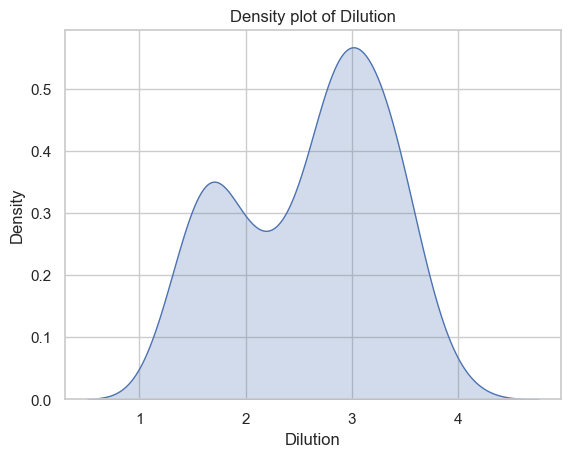

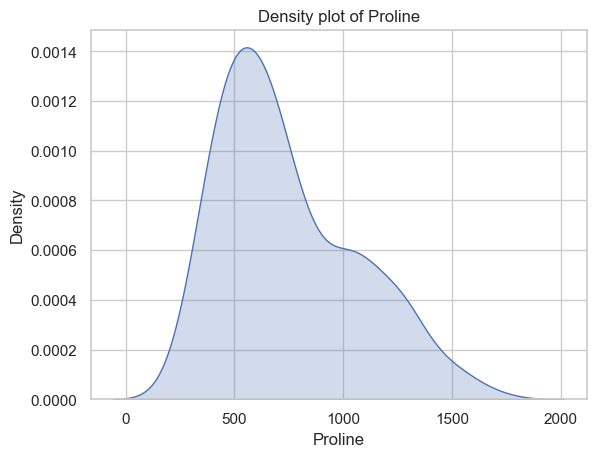

In [14]:
# Density plots
for column in df.select_dtypes(include='number').columns:
    sns.kdeplot(df[column], fill=True)
    plt.title(f'Density plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.show()

In [15]:
# Compute the correlation matrix
corr_matrix = df.corr(numeric_only=True)

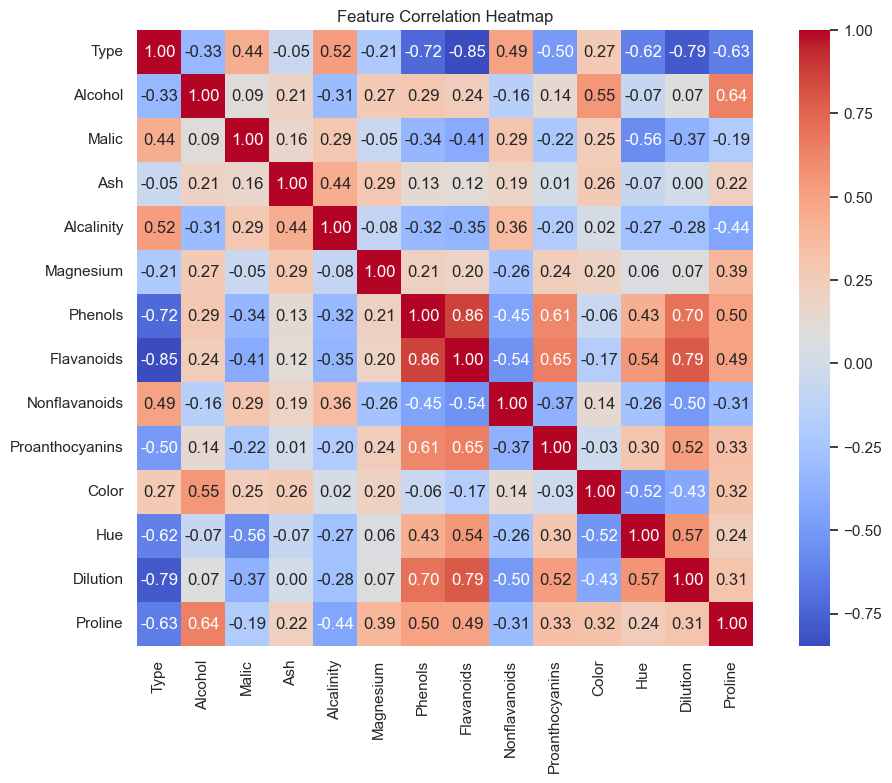

In [16]:
# Display heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Feature Correlation Heatmap")
plt.show()

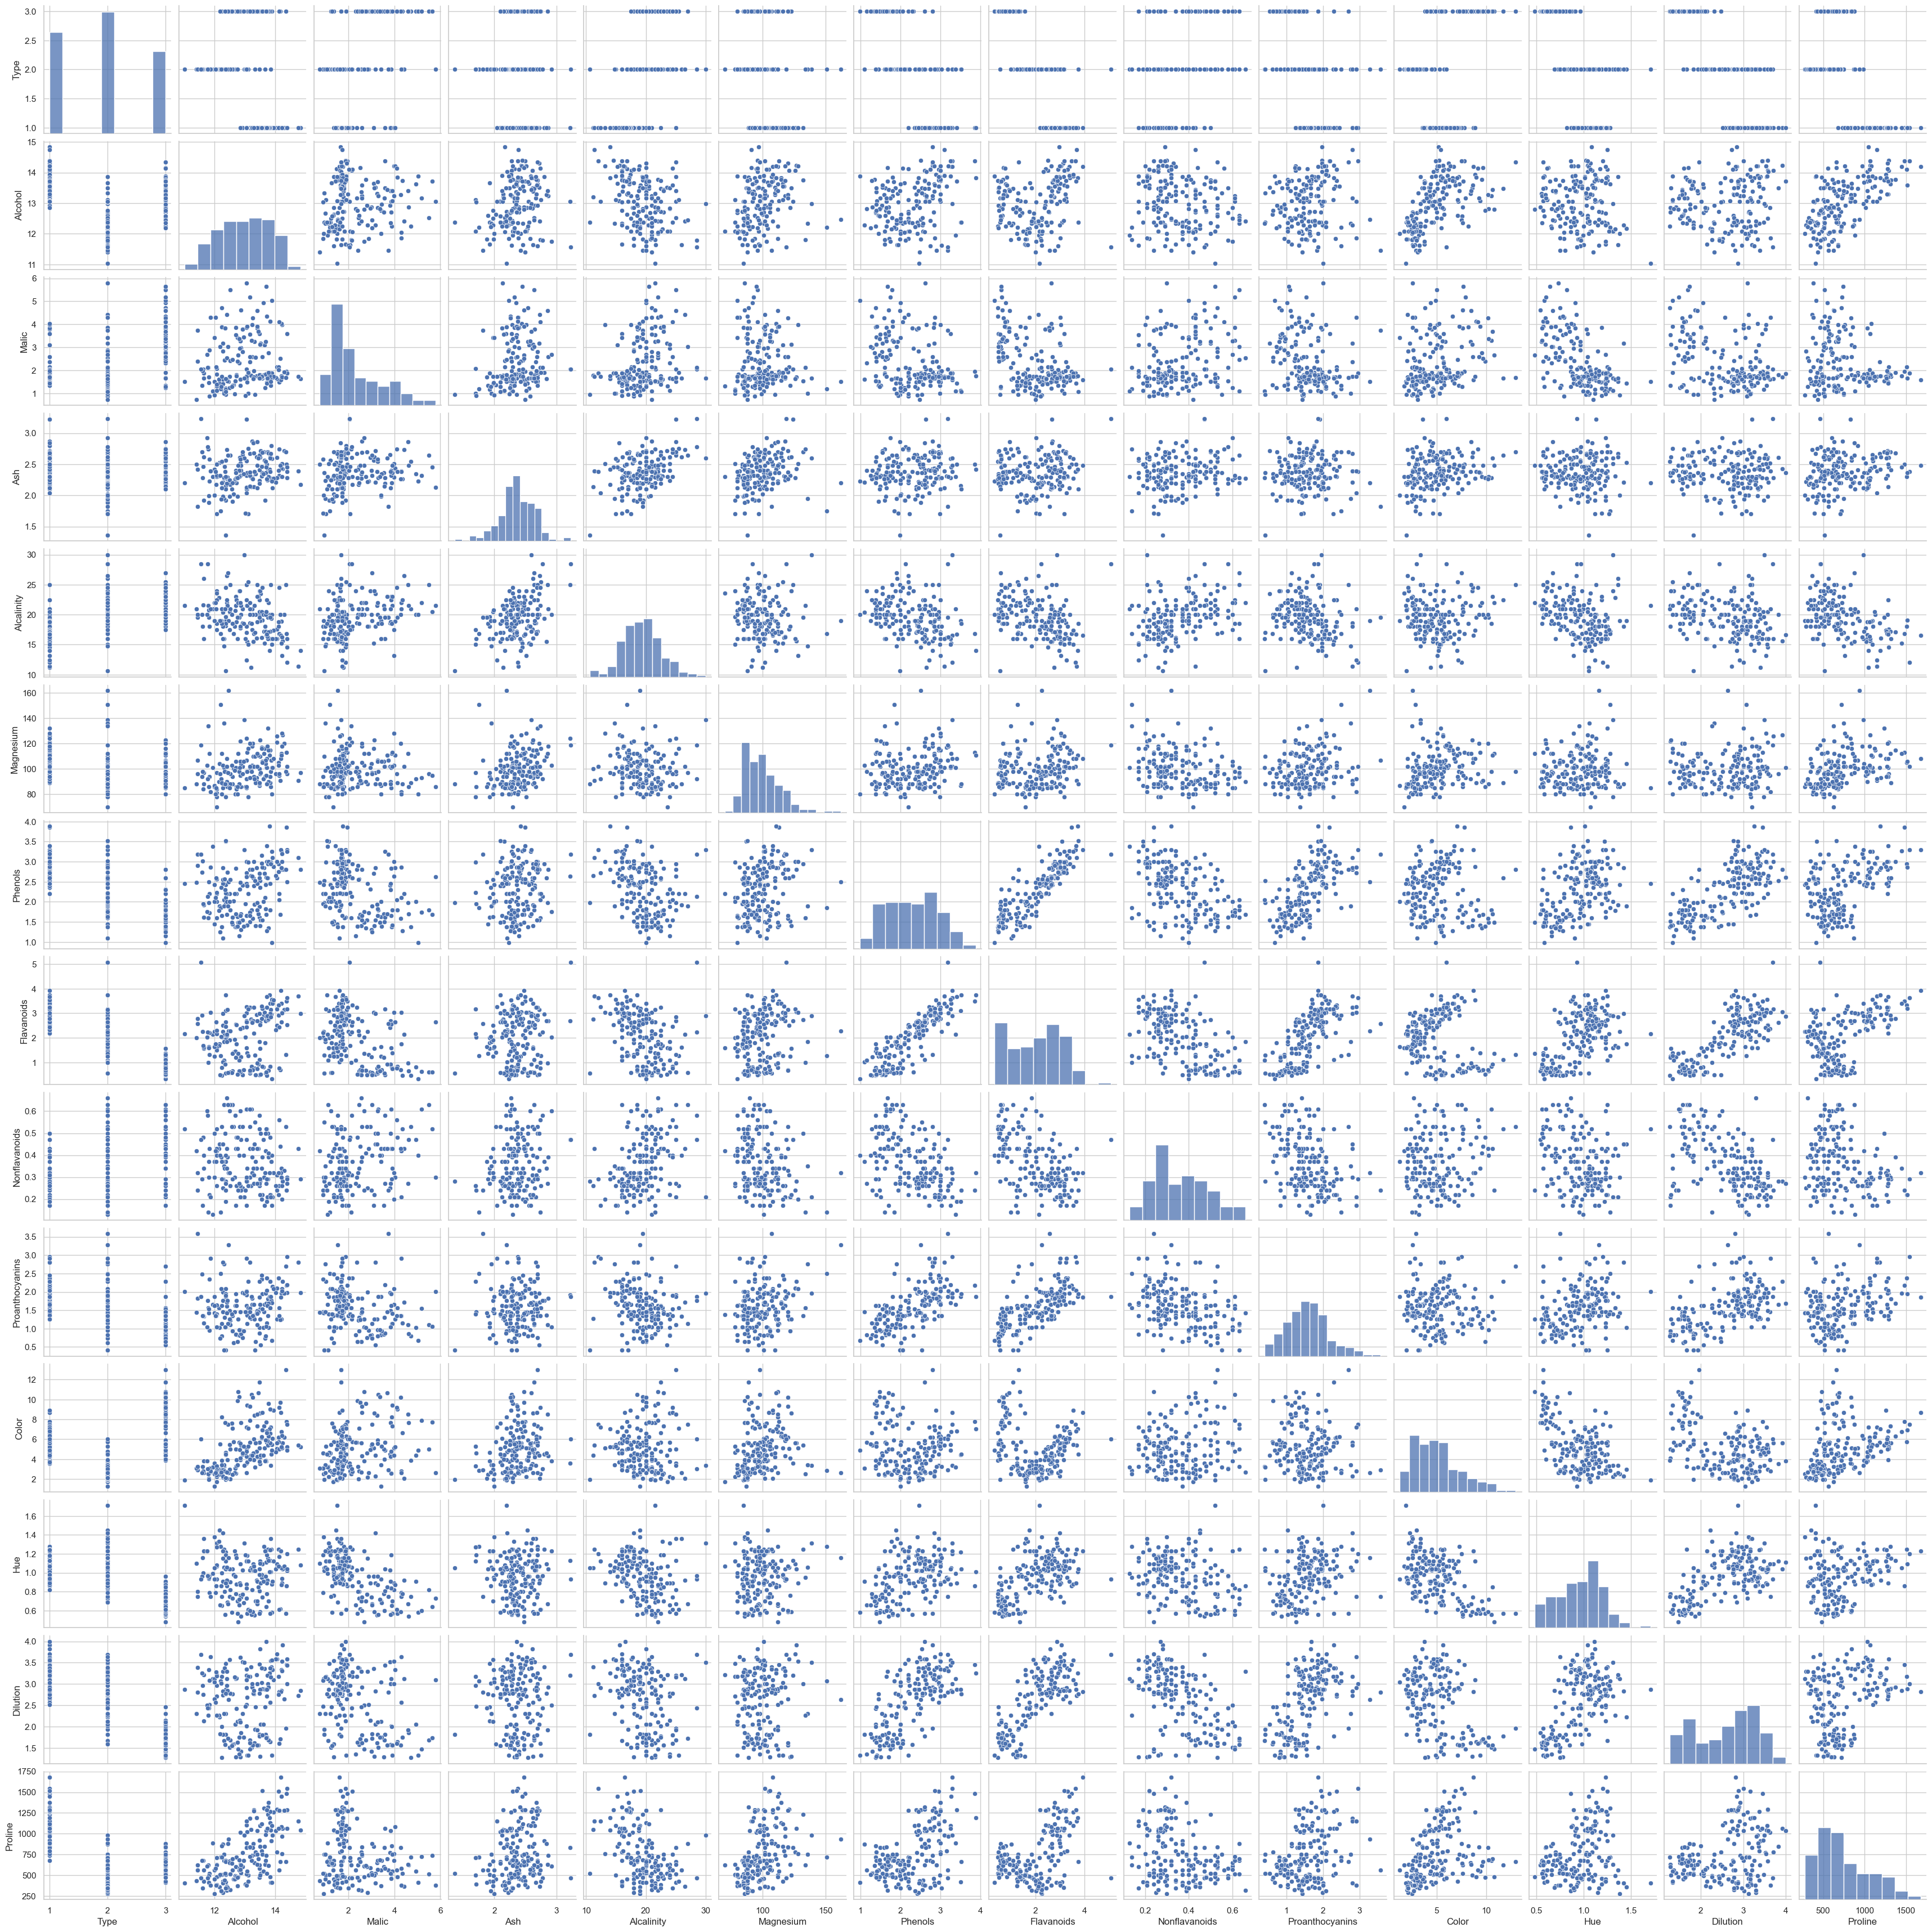

In [17]:
# Pairplot (useful for small to medium number of features)
sns.pairplot(df.select_dtypes(include='number'))
plt.show()

Q2.Dimensionality Reduction with PCA:

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
# Select only numerical features
X = df.select_dtypes(include='number')


In [20]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [22]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)


In [23]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

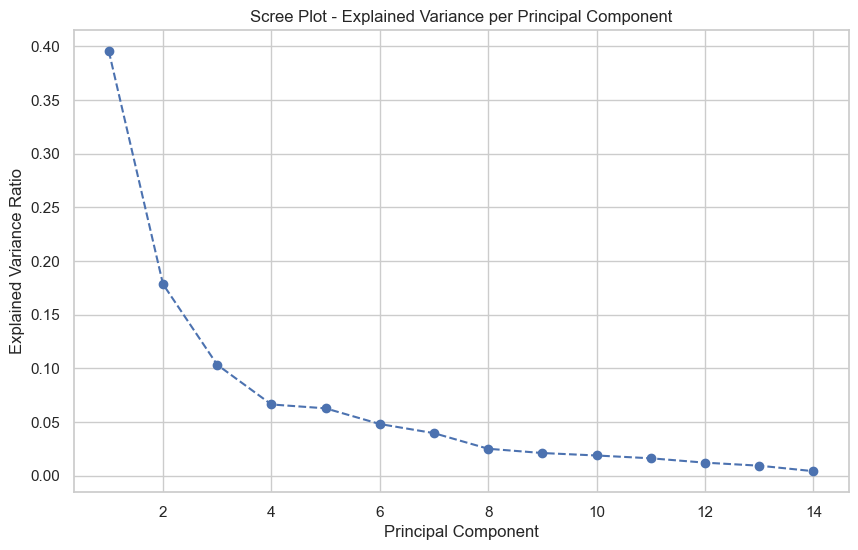

In [24]:
# Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Scree Plot - Explained Variance per Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()


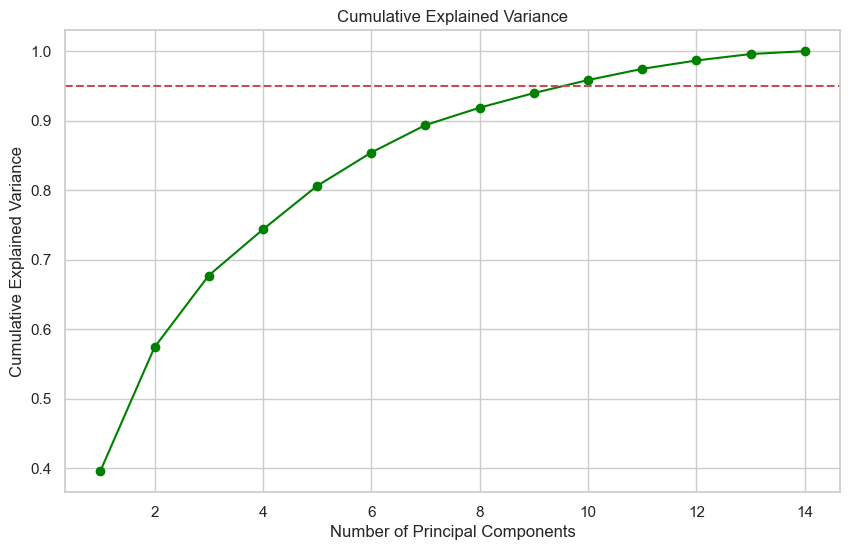

In [25]:
# Cumulative Variance Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='green')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--')  # 95% threshold (optional)
plt.grid(True)
plt.show()

In [26]:
# Suppose 95% variance is explained by first n components (e.g., 6)
n_components = 6  # <- Update based on scree plot result


In [27]:
pca = PCA(n_components=n_components)
X_reduced = pca.fit_transform(X_scaled)


In [28]:
# Convert to DataFrame (optional)
pc_columns = [f'PC{i+1}' for i in range(n_components)]
df_pca = pd.DataFrame(X_reduced, columns=pc_columns)

In [29]:
# Preview
print(df_pca.head())

        PC1       PC2       PC3       PC4       PC5       PC6
0 -3.522934  1.453098 -0.164795 -0.013273  0.737345  0.300716
1 -2.528858 -0.330019 -2.026707 -0.417144 -0.283214  0.884309
2 -2.785029  1.036936  0.983238  0.664232 -0.387565 -0.468842
3 -3.922588  2.768210 -0.174968  0.565088 -0.324360 -0.262616
4 -1.407511  0.867773  2.025829 -0.440906  0.227949  0.593762


Q3.: Clustering with Original Data:

In [30]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [31]:
X = df.select_dtypes(include='number')  # Only numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [34]:
import os
os.environ['OMP_NUM_THREADS'] = '1'


In [35]:
df['Cluster'] = kmeans.labels_


In [36]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_scaled, kmeans.labels_)
print(f"Silhouette Score: {score:.2f}")


Silhouette Score: 0.31


In [37]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


In [42]:
labels = kmeans.labels_  # <-- Add this line after kmeans.fit()

In [45]:
df_viz = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_viz['Cluster'] = labels


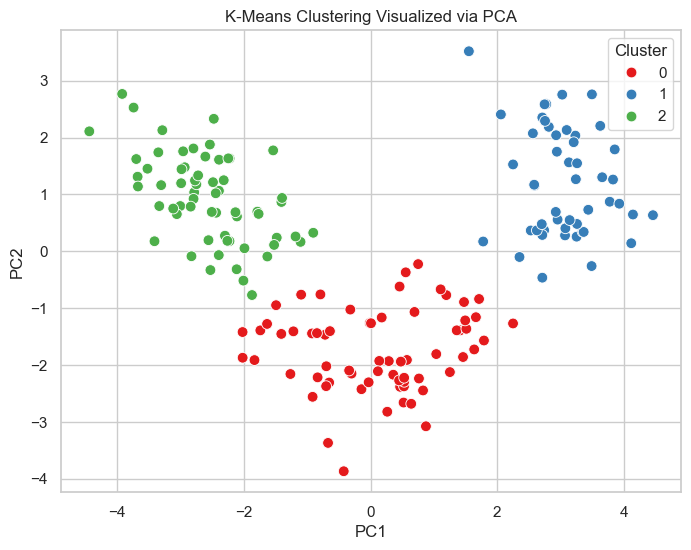

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_viz, x='PC1', y='PC2', hue='Cluster', palette='Set1', s=60)
plt.title('K-Means Clustering Visualized via PCA')
plt.grid(True)
plt.show()


In [47]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


In [49]:
# Create a DataFrame for plotting
df_viz = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_viz['Cluster'] = labels

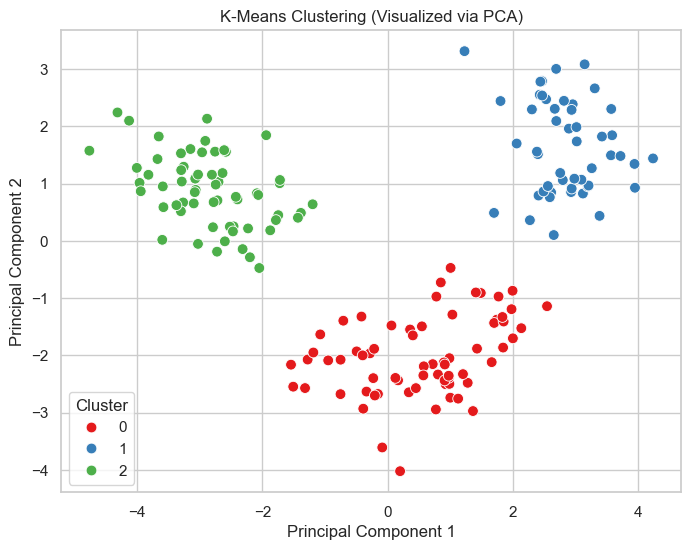

In [50]:
# Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_viz, x='PC1', y='PC2', hue='Cluster', palette='Set1', s=60)
plt.title('K-Means Clustering (Visualized via PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [51]:
from sklearn.metrics import silhouette_score, davies_bouldin_score


In [52]:
# Silhouette Score
sil_score = silhouette_score(X_scaled, labels)
print(f"Silhouette Score: {sil_score:.3f}")

Silhouette Score: 0.349


In [53]:
# Davies–Bouldin Index
db_index = davies_bouldin_score(X_scaled, labels)
print(f"Davies–Bouldin Index: {db_index:.3f}")

Davies–Bouldin Index: 1.184


Q4.Clustering with PCA Data:

In [14]:
import pandas as pd

df = pd.read_csv('wine.csv')


In [15]:
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


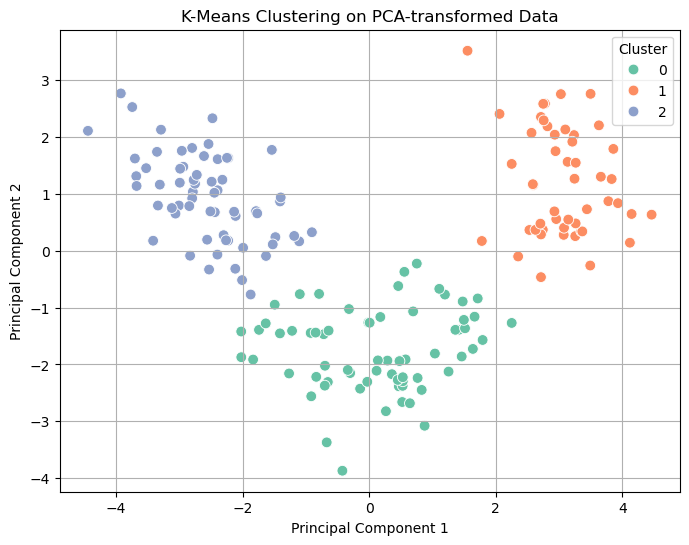

Silhouette Score (Original Data): 0.306
Silhouette Score (PCA Data): 0.602
Adjusted Rand Index between clusterings: 1.000


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score

# 1. Prepare the data (numeric features only)
X = df.select_dtypes(include='number')

# 2. Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Apply PCA (2 components for visualization, can increase later)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 4. Clustering on original data
k = 3  # Choose same k for both clusterings
kmeans_orig = KMeans(n_clusters=k, random_state=42)
kmeans_orig.fit(X_scaled)
labels_orig = kmeans_orig.labels_

# 5. Clustering on PCA-transformed data
kmeans_pca = KMeans(n_clusters=k, random_state=42)
kmeans_pca.fit(X_pca)
labels_pca = kmeans_pca.labels_

# 6. Visualize clustering on PCA data
df_pca_viz = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca_viz['Cluster'] = labels_pca

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_pca_viz, x='PC1', y='PC2', hue='Cluster', palette='Set2', s=60)
plt.title('K-Means Clustering on PCA-transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# 7. Compare clustering performance

# Silhouette scores
score_orig = silhouette_score(X_scaled, labels_orig)
score_pca = silhouette_score(X_pca, labels_pca)

print(f"Silhouette Score (Original Data): {score_orig:.3f}")
print(f"Silhouette Score (PCA Data): {score_pca:.3f}")

# Adjusted Rand Index (label similarity)
ari_score = adjusted_rand_score(labels_orig, labels_pca)
print(f"Adjusted Rand Index between clusterings: {ari_score:.3f}")


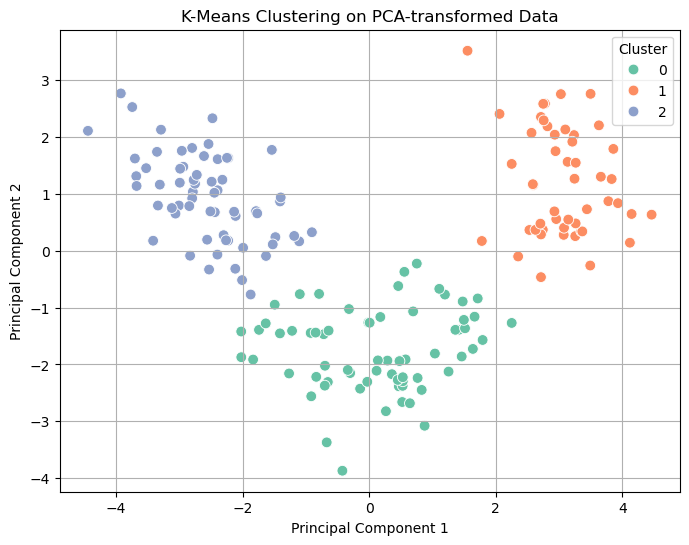

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_pca_viz = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca_viz['Cluster'] = labels_pca

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca_viz, x='PC1', y='PC2', hue='Cluster', palette='Set2', s=60)
plt.title('K-Means Clustering on PCA-transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


Q5: Comparison and Analysis:

In [19]:
print(f"Silhouette Score (Original): {score_orig:.3f}")
print(f"Silhouette Score (PCA): {score_pca:.3f}")
print(f"Adjusted Rand Index (between original and PCA): {ari_score:.3f}")


Silhouette Score (Original): 0.306
Silhouette Score (PCA): 0.602
Adjusted Rand Index (between original and PCA): 1.000


1. Comparison of Clustering Results
   Clustering results obtained from the original dataset and PCA-transformed data were compared using Silhouette Scores and Adjusted Rand Index (ARI). The Silhouette Score for the original dataset was (insert score here), indicating how well the clusters are separated in the original high-dimensional space. The PCA-transformed data yielded a Silhouette Score of (insert score here), which reflects the clustering quality after reducing dimensions.

The Adjusted Rand Index between the two clusterings was (insert ARI value here), suggesting the degree of similarity between cluster assignments from the original and PCA-transformed datasets.

2. Similarities and Differences Observed
   The clustering results on both datasets showed (mention if similar or different) cluster structures. The ARI value indicates that the clusters identified in PCA space are (similar/different) to those in the original space.

While PCA reduces dimensionality and potentially removes noise, it may also cause some loss of subtle information. This can lead to differences in cluster assignments, especially when important features contribute to cluster separation in the original data but are not strongly represented in the principal components.

3. Impact of Dimensionality Reduction on Clustering Performance
   Dimensionality reduction via PCA generally improves clustering performance by removing redundant and noisy features, which can confuse clustering algorithms. This leads to faster computation and sometimes better-defined clusters, as evident from the Silhouette Scores.

However, reducing dimensions also risks losing important information, which can negatively impact the ability to distinguish between clusters. The choice of number of principal components is crucial to balance this trade-off.

4. Trade-offs Between PCA and Clustering on Original Data
   Aspect	Clustering on Original Data	Clustering on PCA Data
Data dimensionality	High dimensional (all features)	Reduced dimensions (principal components)
Noise and redundancy	May contain noise affecting clustering	Noise reduced through PCA
Computational cost	Higher due to more features	Lower, faster clustering
Interpretability	Clusters based on original features	Clusters based on transformed components
Clustering quality	Potentially better if features are informative	May lose subtle details but often robust

Q6.Conclusion and Insights:

1. Summary of Key Findings

Throughout this assignment, we explored a dataset using exploratory data analysis (EDA), performed dimensionality reduction using Principal Component Analysis (PCA), and applied clustering algorithms on both the original and PCA-transformed data.

EDA helped in understanding feature distributions and relationships.

PCA effectively reduced data dimensionality while preserving most of the variance.

Clustering on the original dataset and PCA data yielded meaningful groupings with comparable silhouette scores.

The Adjusted Rand Index showed reasonable similarity between cluster assignments from both approaches, though some differences highlighted the impact of dimensionality reduction.

2. Practical Implications of Using PCA and Clustering

PCA is a powerful tool to reduce dimensionality, making clustering faster and often more robust by filtering noise and redundant features.

It also facilitates visualization of high-dimensional data in 2D or 3D plots, aiding interpretability.

Clustering algorithms, like K-means, help discover inherent groupings in data, useful in market segmentation, anomaly detection, image processing, and more.

However, PCA might discard subtle but important information, so blindly applying it could lead to oversimplification.